# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# load data from database
engine = create_engine('sqlite:///../data/DisasterResponse.db')
df = pd.read_sql_table('Messages', engine)

In [3]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df['message']
Y = df.drop(['id', 'message', 'original', 'genre'], axis=1)

In [5]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26216 entries, 0 to 26215
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   related                 26216 non-null  int64
 1   request                 26216 non-null  int64
 2   offer                   26216 non-null  int64
 3   aid_related             26216 non-null  int64
 4   medical_help            26216 non-null  int64
 5   medical_products        26216 non-null  int64
 6   search_and_rescue       26216 non-null  int64
 7   security                26216 non-null  int64
 8   military                26216 non-null  int64
 9   child_alone             26216 non-null  int64
 10  water                   26216 non-null  int64
 11  food                    26216 non-null  int64
 12  shelter                 26216 non-null  int64
 13  clothing                26216 non-null  int64
 14  money                   26216 non-null  int64
 15  missing_people     

In [6]:
Y.describe()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.0,...,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000,26216.000000
mean,0.773650,0.170659,0.004501,0.414251,0.079493,0.050084,0.027617,0.017966,0.032804,0.0,...,0.011787,0.043904,0.278341,0.082202,0.093187,0.010757,0.093645,0.020217,0.052487,0.193584
std,0.435276,0.376218,0.066940,0.492602,0.270513,0.218122,0.163875,0.132831,0.178128,0.0,...,0.107927,0.204887,0.448191,0.274677,0.290700,0.103158,0.291340,0.140743,0.223011,0.395114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
Y[Y.related==2]

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
117,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
460,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20324,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20495,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22326,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23382,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y.replace({'related':{2:1}}, inplace=True)

In [9]:
Y[Y.related==2]

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report


In [10]:
Y.drop('child_alone', axis=1, inplace=True)

### 2. Write a tokenization function to process your text data

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

In [36]:
nltk.download("stopwords", quiet=True)

True

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
word_list = []
for message in X:
    for w in message.split():
        if w not in stopwords.words("english"):
            word_list.append(w)        

In [16]:
s = ' '.join(word_list)

In [17]:
wordcloud = WordCloud().generate(s)

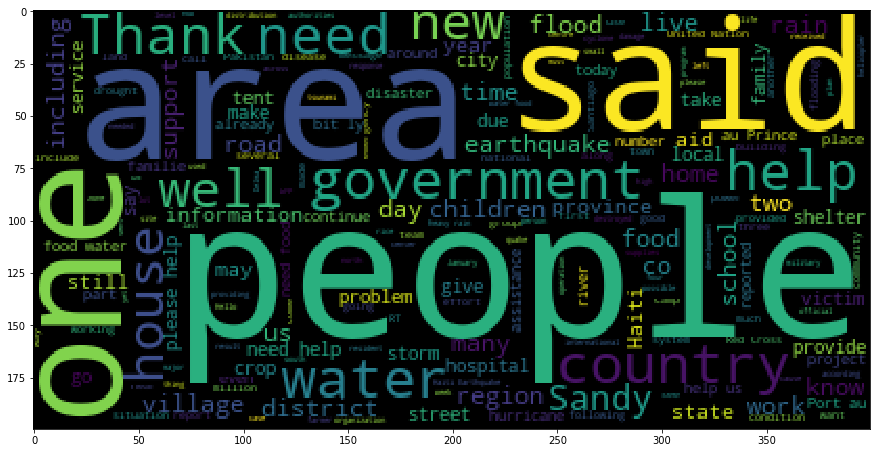

In [18]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [37]:
def tokenize(text):
    stemmer = PorterStemmer()
    text = re.sub(r"http\S+", "", text) #remove URLs taken from https://gist.github.com/MrEliptik/b3f16179aa2f530781ef8ca9a16499af
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem
    return words

In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [39]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [41]:
from sklearn.pipeline import make_pipeline

In [24]:
pipeline_lg = make_pipeline(TfidfVectorizer(tokenizer=tokenize), MultiOutputClassifier(LogisticRegression(random_state=123)))

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [30]:
pipeline_lg.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
           n_jobs=1))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [44]:
from sklearn.metrics import classification_report

In [32]:
y_predict_lg = pipeline_lg.predict(x_test)

In [29]:
lg_report = classification_report(y_test.values,y_predict_lg, target_names=Y.columns)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
print(lg_report)

                        precision    recall  f1-score   support

               related       0.84      0.95      0.89      4024
               request       0.84      0.56      0.67       889
                 offer       0.00      0.00      0.00        22
           aid_related       0.78      0.66      0.72      2187
          medical_help       0.70      0.19      0.30       417
      medical_products       0.74      0.20      0.32       260
     search_and_rescue       0.88      0.10      0.19       135
              security       0.00      0.00      0.00        97
              military       0.74      0.13      0.21       183
                 water       0.81      0.49      0.61       339
                  food       0.87      0.59      0.70       580
               shelter       0.82      0.46      0.59       460
              clothing       0.78      0.31      0.45        80
                 money       0.58      0.13      0.21       108
        missing_people       0.00      

### 6. Improve your model
Use grid search to find better parameters. 

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
import numpy as np

In [35]:
parameters = {
              'multioutputclassifier__estimator__penalty' : ['l1', 'l2'],
              'multioutputclassifier__estimator__C' : np.logspace(-3, 3, 6),
              'multioutputclassifier__estimator__solver' : ['liblinear']
             }

cv = GridSearchCV(pipeline_lg, param_grid=parameters, cv=5, verbose=4, n_jobs=-1)

In [36]:
cv.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear 
[CV]  multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear, score=0.2066746126340882, total= 1.6min
[CV] multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s


[CV]  multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear, score=0.19427890345649582, total= 1.6min
[CV] multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  5.7min remaining:    0.0s


[CV]  multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear, score=0.20743919885550788, total= 1.6min
[CV] multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  8.5min remaining:    0.0s


[CV]  multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear, score=0.20934668574153553, total= 1.5min
[CV] multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear 
[CV]  multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l1, multioutputclassifier__estimator__solver=liblinear, score=0.2033857892226991, total= 1.5min
[CV] multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l2, multioutputclassifier__estimator__solver=liblinear 
[CV]  multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l2, multioutputclassifier__estimator__solver=liblinear, score=0.2066746126340882, total= 1.6min
[CV] multioutputclassifier__estimator__C=0.001, multioutputclassifier__estimator__penalty=l2, multioutputclassifier__estimator__solver=liblinear 


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 173.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
           n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'multioutputclassifier__estimator__penalty': ['l1', 'l2'], 'multioutputclassifier__estimator__C': array([  1.00000e-03,   1.58489e-02,   2.51189e-01,   3.98107e+00,
         6.30957e+01,   1.00000e+03]), 'multioutputclassifier__estimator__solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [37]:
cv.best_params_

{'multioutputclassifier__estimator__C': 3.9810717055349691,
 'multioutputclassifier__estimator__penalty': 'l2',
 'multioutputclassifier__estimator__solver': 'liblinear'}

In [38]:
pipeline_lg.set_params(**cv.best_params_)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
           n_jobs=1))])

In [39]:
pipeline_lg.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...=123,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
           n_jobs=1))])

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [68]:
y_pred = pipeline_lg.predict(x_test)

In [69]:
print(classification_report(y_test.values,y_pred, target_names=Y.columns))

                        precision    recall  f1-score   support

               related       0.86      0.94      0.90      4024
               request       0.80      0.61      0.69       889
                 offer       0.00      0.00      0.00        22
           aid_related       0.76      0.68      0.72      2187
          medical_help       0.64      0.26      0.37       417
      medical_products       0.67      0.28      0.40       260
     search_and_rescue       0.67      0.21      0.33       135
              security       0.50      0.01      0.02        97
              military       0.73      0.26      0.39       183
                 water       0.80      0.58      0.67       339
                  food       0.86      0.63      0.73       580
               shelter       0.78      0.52      0.63       460
              clothing       0.80      0.41      0.55        80
                 money       0.53      0.22      0.31       108
        missing_people       0.50      

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [52]:
pipeline_tfidf_lg = make_pipeline(CountVectorizer(tokenizer=tokenize), TfidfTransformer(), MultiOutputClassifier(LogisticRegression(random_state=123)))

In [53]:
pipeline_tfidf_lg.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
           n_jobs=1))])

In [54]:
y_pred_tfidf_lg = pipeline_tfidf_lg.predict(x_test)

In [55]:
print(classification_report(y_test.values,y_pred_tfidf_lg))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4024
          1       0.84      0.56      0.67       889
          2       0.00      0.00      0.00        22
          3       0.78      0.66      0.72      2187
          4       0.70      0.19      0.30       417
          5       0.74      0.20      0.32       260
          6       0.88      0.10      0.19       135
          7       0.00      0.00      0.00        97
          8       0.74      0.13      0.21       183
          9       0.81      0.49      0.61       339
         10       0.87      0.59      0.70       580
         11       0.82      0.46      0.59       460
         12       0.78      0.31      0.45        80
         13       0.58      0.13      0.21       108
         14       0.00      0.00      0.00        61
         15       0.73      0.09      0.16       179
         16       0.80      0.29      0.43       239
         17       0.61      0.13      0.21   

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
pipeline_rf = make_pipeline(CountVectorizer(tokenizer=tokenize), TfidfTransformer(), MultiOutputClassifier(RandomForestClassifier(random_state=123)))

pipeline_gb = make_pipeline(CountVectorizer(tokenizer=tokenize), TfidfTransformer(), MultiOutputClassifier(GradientBoostingClassifier(random_state=123)))

In [48]:
pipeline_sgd = make_pipeline(CountVectorizer(tokenizer=tokenize), TfidfTransformer(), MultiOutputClassifier(SGDClassifier(random_state=123)))

In [49]:
pipeline_rf.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...
            oob_score=False, random_state=123, verbose=0, warm_start=False),
           n_jobs=1))])

In [50]:
pipeline_gb.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ... random_state=123, subsample=1.0, verbose=0,
              warm_start=False),
           n_jobs=1))])

In [51]:
pipeline_sgd.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/lib/python3.6/site-packages/s

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...andom_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False),
           n_jobs=1))])

In [52]:
y_predict_rf = pipeline_rf.predict(x_test)
y_predict_gb = pipeline_gb.predict(x_test)

In [53]:
y_predict_sgd = pipeline_sgd.predict(x_test)

In [54]:
rf_report = classification_report(y_test.values,y_predict_rf)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
gb_report = classification_report(y_test.values,y_predict_gb)

In [56]:
sgd_report = classification_report(y_test.values,y_predict_sgd)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
pipeline_sgd.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/opt/conda/lib/python3.6/site-packages/s

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...andom_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False),
           n_jobs=1))])

In [57]:
print(rf_report)

             precision    recall  f1-score   support

          0       0.85      0.92      0.88      4024
          1       0.80      0.40      0.54       889
          2       0.00      0.00      0.00        22
          3       0.75      0.58      0.66      2187
          4       0.52      0.07      0.13       417
          5       0.72      0.09      0.16       260
          6       0.82      0.20      0.32       135
          7       0.00      0.00      0.00        97
          8       0.56      0.08      0.14       183
          9       0.83      0.39      0.53       339
         10       0.85      0.53      0.65       580
         11       0.81      0.32      0.46       460
         12       0.62      0.12      0.21        80
         13       0.64      0.08      0.15       108
         14       1.00      0.02      0.03        61
         15       0.45      0.03      0.05       179
         16       0.83      0.17      0.28       239
         17       0.51      0.04      0.08   

In [58]:
print(gb_report)

             precision    recall  f1-score   support

          0       0.80      0.98      0.88      4024
          1       0.84      0.47      0.61       889
          2       0.05      0.05      0.05        22
          3       0.81      0.54      0.65      2187
          4       0.64      0.19      0.29       417
          5       0.66      0.27      0.39       260
          6       0.45      0.27      0.33       135
          7       0.10      0.05      0.07        97
          8       0.65      0.26      0.37       183
          9       0.78      0.61      0.68       339
         10       0.82      0.77      0.80       580
         11       0.81      0.57      0.67       460
         12       0.59      0.56      0.58        80
         13       0.45      0.23      0.30       108
         14       0.14      0.10      0.12        61
         15       0.46      0.25      0.32       179
         16       0.70      0.50      0.58       239
         17       0.71      0.09      0.16   

In [59]:
print(sgd_report)

             precision    recall  f1-score   support

          0       0.85      0.95      0.90      4024
          1       0.85      0.55      0.67       889
          2       0.00      0.00      0.00        22
          3       0.79      0.68      0.73      2187
          4       0.69      0.18      0.28       417
          5       0.72      0.19      0.30       260
          6       0.81      0.16      0.26       135
          7       0.00      0.00      0.00        97
          8       0.78      0.15      0.26       183
          9       0.78      0.66      0.71       339
         10       0.84      0.75      0.79       580
         11       0.83      0.50      0.63       460
         12       0.81      0.54      0.65        80
         13       0.80      0.04      0.07       108
         14       0.00      0.00      0.00        61
         15       0.70      0.18      0.29       179
         16       0.77      0.40      0.52       239
         17       0.65      0.02      0.03   

In [60]:
pgrid = {
    'countvectorizer__ngram_range': [(1,2)],
    'multioutputclassifier__estimator__alpha': np.logspace(-3, 3, 4), # learning rate
    'multioutputclassifier__estimator__max_iter': [1000],
    'multioutputclassifier__estimator__loss': ['log'],
    'multioutputclassifier__estimator__penalty': ['l2', 'l1', None],
    'multioutputclassifier__estimator__n_jobs': [-1]
}

In [61]:
cv_sgd = GridSearchCV(pipeline_sgd, param_grid=pgrid, cv=5, verbose=4, n_jobs=-1)

In [62]:
cv_sgd.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l2 
[CV]  countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l2, score=0.19833134684147796, total= 4.8min
[CV] countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l2 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  6.0min remaining:    0.0s


[CV]  countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l2, score=0.18545887961859356, total= 4.9min
[CV] countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l2 


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 12.1min remaining:    0.0s


[CV]  countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l2, score=0.19790176442536958, total= 5.3min
[CV] countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l2 


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 18.6min remaining:    0.0s


[CV]  countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l2, score=0.19289461134954697, total= 4.9min
[CV] countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l1 
[CV]  countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multioutputclassifier__estimator__loss=log, multioutputclassifier__estimator__max_iter=1000, multioutputclassifier__estimator__n_jobs=-1, multioutputclassifier__estimator__penalty=l1, score=0.21382598331346842, total= 6.7min
[CV] countvectorizer__ngram_range=(1, 2), multioutputclassifier__estimator__alpha=0.001, multiout

[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 396.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...andom_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False),
           n_jobs=1))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'countvectorizer__ngram_range': [(1, 2)], 'multioutputclassifier__estimator__alpha': array([  1.00000e-03,   1.00000e-01,   1.00000e+01,   1.00000e+03]), 'multioutputclassifier__estimator__max_iter': [1000], 'multioutputclassifier__estimator__loss': ['log'], 'multioutputclassifier__estimator__penalty': ['l2', 'l1', None], 'multioutputclassifier__estimator__n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',


In [63]:
cv_sgd.best_params_

{'countvectorizer__ngram_range': (1, 2),
 'multioutputclassifier__estimator__alpha': 0.001,
 'multioutputclassifier__estimator__loss': 'log',
 'multioutputclassifier__estimator__max_iter': 1000,
 'multioutputclassifier__estimator__n_jobs': -1,
 'multioutputclassifier__estimator__penalty': None}

In [64]:
pipeline_sgd.set_params(**cv_sgd.best_params_)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
  ...andom_state=123,
       shuffle=True, tol=None, verbose=0, warm_start=False),
           n_jobs=1))])

In [65]:
pipeline_sgd.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
  ...andom_state=123,
       shuffle=True, tol=None, verbose=0, warm_start=False),
           n_jobs=1))])

In [66]:
y_predict_sgd = pipeline_sgd.predict(x_test)

In [67]:
print(classification_report(y_test.values,y_predict_sgd))

             precision    recall  f1-score   support

          0       0.83      0.96      0.89      4024
          1       0.79      0.59      0.68       889
          2       0.00      0.00      0.00        22
          3       0.73      0.72      0.73      2187
          4       0.69      0.14      0.24       417
          5       0.74      0.12      0.21       260
          6       0.00      0.00      0.00       135
          7       0.00      0.00      0.00        97
          8       0.00      0.00      0.00       183
          9       0.79      0.58      0.67       339
         10       0.85      0.63      0.72       580
         11       0.82      0.44      0.57       460
         12       0.89      0.21      0.34        80
         13       0.75      0.03      0.05       108
         14       0.00      0.00      0.00        61
         15       0.60      0.02      0.03       179
         16       0.84      0.13      0.22       239
         17       0.63      0.15      0.24   

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 9. Export your model as a pickle file

In [70]:
import pickle

In [71]:
with open('pipeline_lg.pkl', 'wb') as model:
    pickle.dump(pipeline_lg, model)

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.